In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from frbpoppy import unpickle

In [54]:
surv_pop1 = unpickle('mcmc/reuse_test/surveyed_pl_reuse')
surv_pop2 = unpickle('mcmc/reuse_test/surveyed_pl_no_reuse')

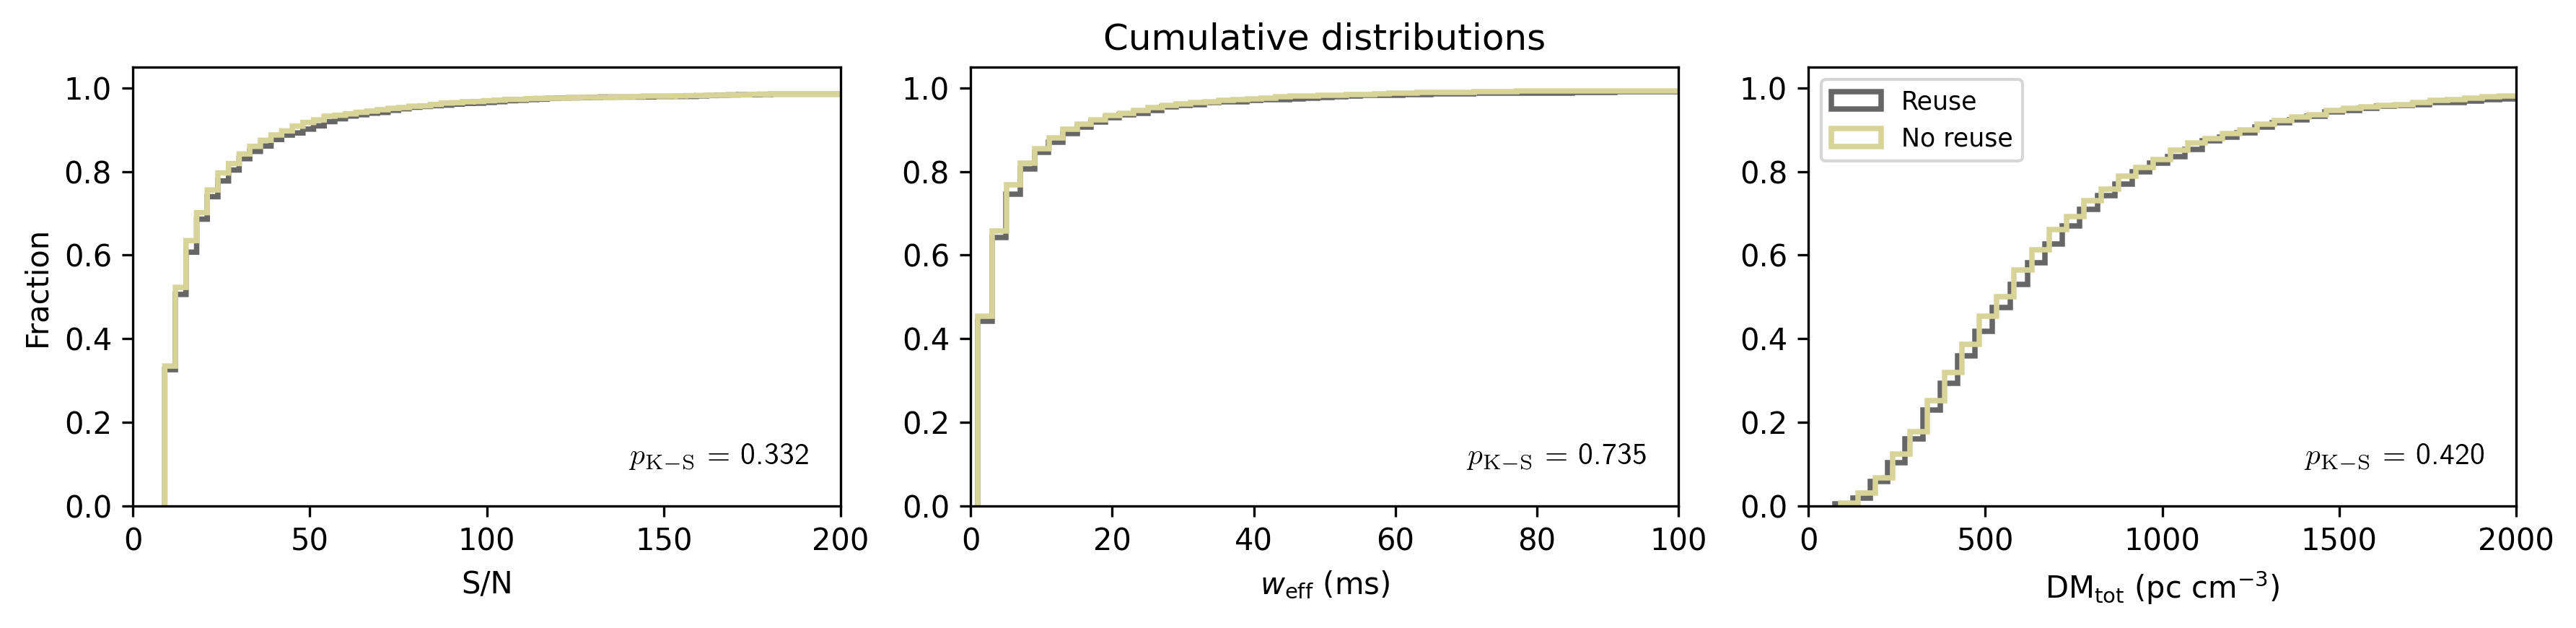

In [55]:
fig = plt.figure(figsize=(12,3), dpi=300)

lw = 1.8
ax1 = plt.subplot2grid((1,3),(0,0), rowspan=1)

ax1.hist(surv_pop1.frbs.snr, cumulative=True, density=True, histtype='step', \
         bins=int((max(surv_pop1.frbs.snr)-9)/3), color='#666666', alpha=1.0, label='Reuse', linewidth=lw)#F4CE91
ax1.hist(surv_pop2.frbs.snr, cumulative=True, density=True, histtype='step', \
         bins=int((max(surv_pop2.frbs.snr)-9)/3), color='#d8d397', alpha=1.0, label='No reuse', linewidth=lw)#6CBFBF
#ax1.set_title('Cumulative distributions for S/N')
#ax1.grid('True', color='gainsboro')
ax1.set_xlabel('S/N')
ax1.set_ylabel('Fraction')
#ax1.legend(loc='upper left')
ax1.set_xlim(0, 200)
ax1.text(140, 0.1, '$p_\mathrm{K-S}$ = ' + str(format(ks_2samp(surv_pop1.frbs.snr, surv_pop2.frbs.snr)[1], '.3f')), usetex=True)
#plt.savefig('best_fitting_snr_distribution.pdf')

ax2 = plt.subplot2grid((1,3),(0,1), rowspan=1)
ax2.hist(surv_pop1.frbs.w_eff, cumulative=True, density=True, histtype='step', \
         bins=int(max(surv_pop1.frbs.w_eff)/2), color='#666666', alpha=1, label='Reuse', linewidth=lw)#F4CE91
ax2.hist(surv_pop2.frbs.w_eff, cumulative=True, density=True, histtype='step', \
         bins=int(max(surv_pop2.frbs.w_eff)/2), color='#d8d397', alpha=1, label='No reuse', linewidth=lw)#6CBFBF
ax2.set_title('Cumulative distributions')
#ax2.grid('True', color='gainsboro')
ax2.set_xlabel('$w_\mathrm{eff}$ (ms)')
#ax2.set_ylabel('Fraction')
#ax2.legend(loc='upper left')
ax2.set_xlim(0, 100)
ax2.text(70, 0.1, '$p_\mathrm{K-S}$ = ' + str(format(ks_2samp(np.round(surv_pop1.frbs.w_eff / 0.983) * 0.983, np.round(surv_pop2.frbs.w_eff / 0.983) * 0.983)[1], '.3f')), usetex=True)
#plt.savefig('best_fitting_snr_distribution.pdf')

ax3 = plt.subplot2grid((1,3),(0,2), rowspan=1)
ax3.hist(surv_pop1.frbs.dm, cumulative=True, density=True, histtype='step', \
         bins=int(max(surv_pop1.frbs.dm)/50), color='#666666', alpha=1, label='Reuse', linewidth=lw)#F4CE91
ax3.hist(surv_pop2.frbs.dm, cumulative=True, density=True, histtype='step', \
         bins=int(max(surv_pop2.frbs.dm)/50), color='#d8d397', alpha=1, label='No reuse', linewidth=lw)#6CBFBF
#ax3.set_title('Cumulative distributions for DM')
#ax3.grid('True', color='gainsboro')
ax3.set_xlabel('DM$_\mathrm{tot}$ (pc cm$^{-3}$)')
#ax3.set_ylabel('Fraction')
ax3.legend(loc='upper left', fontsize='small')
ax3.set_xlim(0, 2000)
ax3.text(1400, 0.1, '$p_\mathrm{K-S}$ = ' + str(format(ks_2samp(surv_pop1.frbs.dm, surv_pop2.frbs.dm)[1], '.3f')), usetex=True)

plt.tight_layout()
plt.savefig('reuse_compare.pdf', transparent=True)
plt.show()